In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras.preprocessing
from PIL import Image
import os

In [2]:
data=[]
labels=[]
classes=43
os.chdir('C:\\Users\\naman\\Traffic_Sign_Recognition')
cur=os.getcwd()

In [7]:
for i in range(classes):
    path=os.path.join(cur,'train',str(i))
    images=os.listdir(path)
    for j in images:
        try:
            image=Image.open(path +'\\' + j)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [10]:
data=np.array(data)
labels=np.array(labels)

In [11]:
data.shape

(53566, 30, 30, 3)

In [12]:
labels.shape

(53566,)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,train_size=0.2)
from keras.utils import to_categorical
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(43,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model_history=model.fit(x_train,y_train,epochs=17,validation_data=(x_test,y_test),batch_size=64)

Epoch 1/17
168/168 [==============================] - 186s 1s/step - loss: 0.4573 - accuracy: 0.8760 - val_loss: 0.1434 - val_accuracy: 0.9653
Epoch 2/17
168/168 [==============================] - 220s 1s/step - loss: 0.3369 - accuracy: 0.9098 - val_loss: 0.1387 - val_accuracy: 0.9690
Epoch 3/17
168/168 [==============================] - 156s 932ms/step - loss: 0.2785 - accuracy: 0.9226 - val_loss: 0.1608 - val_accuracy: 0.9607
Epoch 4/17
168/168 [==============================] - 160s 954ms/step - loss: 0.2520 - accuracy: 0.9286 - val_loss: 0.1173 - val_accuracy: 0.9725
Epoch 5/17
168/168 [==============================] - 157s 937ms/step - loss: 0.1962 - accuracy: 0.9417 - val_loss: 0.1101 - val_accuracy: 0.9723
Epoch 6/17
168/168 [==============================] - 156s 932ms/step - loss: 0.2094 - accuracy: 0.9420 - val_loss: 0.0821 - val_accuracy: 0.9806
Epoch 7/17
168/168 [==============================] - 155s 923ms/step - loss: 0.1889 - accuracy: 0.9480 - val_loss: 0.0816 - val_a

(0.0, 1.0)

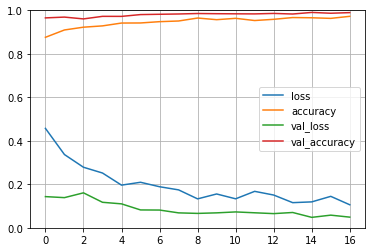

In [20]:
pd.DataFrame(model_history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_test=pd.read_csv(r'C:\Users\naman\Traffic_Sign_Recognition\Test.csv')

In [23]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [27]:
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict_classes(X_test)

C:\Users\naman\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
print(accuracy_score(labels, pred))
model.save('traffic.h5')

0.9589073634204276


In [29]:
from keras.models import load_model

In [30]:
model=load_model('traffic.h5')

In [31]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [32]:
def test_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Speed limit (50km/h)


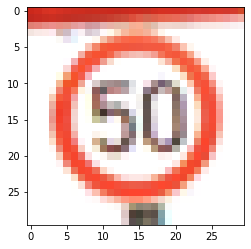

In [34]:
plot,prediction = test_img(r'C:\Users\naman\Traffic_Sign_Recognition\test\00124.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)